## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### April 2019

In [120]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [121]:
#df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [122]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [123]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [124]:
#Showing  the weights
mlp.coefs_

[array([[-1.93306393e+01, -2.19847626e-02,  4.67280387e+01,
         -1.21251200e+01, -1.67606515e+01],
        [ 9.31589043e+01, -3.73206703e-01,  4.15846672e+01,
         -1.23368759e+01, -3.21037745e+00]]), array([[-7.01419931e-04],
        [ 9.44058482e-01],
        [ 1.10475826e-02],
        [ 1.96857243e+00],
        [-1.35496680e+00]])]

In [125]:
#Showing the biases
mlp.intercepts_

[array([-7.44811572,  0.45692388,  1.39966161, -0.16317004,  0.57152039]),
 array([-51.31888278])]

In [126]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [3.10862447e-15, 1.00000000e+00],
       [6.56805055e-10, 9.99999999e-01],
       [1.19992905e-12, 1.00000000e+00],
       [4.33475522e-09, 9.99999996e-01],
       [2.44449664e-08, 9.99999976e-01],
       [1.19239471e-07, 9.99999881e-01],
       [6.26212371e-09, 9.99999994e-01],
       [8.37275879e-04, 9.99162724e-01],
       [1.70068306e-03, 9.98299317e-01],
       [2.60741650e-10, 1.00000000e+00],
       [1.20121468e-10, 1.00000000e+00],
       [3.12620131e-01, 6.87379869e-01],
       [8.63373567e-06, 9.99991366e-01],
       [3.77435916e-06, 9.99996226e-01],
       [2.69701921e-02, 9.73029808e-01],
       [1.20471486e-04, 9.99879529e-01],
       [1.78931027e-01, 8.21068973e-01],
       [2.26344461e-02, 9.77365554e-01],
       [1.69525938e-04, 9.99830474e-01],
       [5.47287861e-07, 9.99999453e-01],
       [9.931020

In [127]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [128]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [129]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



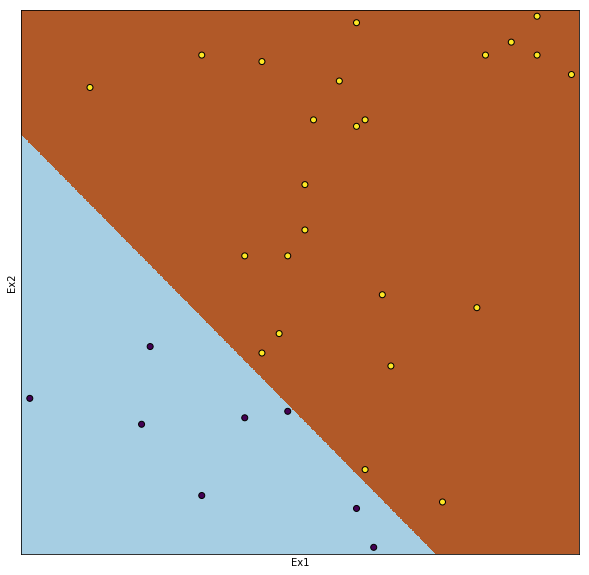

In [130]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [131]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=1000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [132]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [133]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [134]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

### Example 2. Nnets applied to Diabetes

In [135]:
#url= "http://academic.uprm.edu/eacuna/diabetes.dat"
url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [136]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [137]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [138]:
#mlp.coefs_

In [139]:
#mlp.intercepts_

In [140]:
pred=mlp.predict(X_test)

In [141]:
mlp.score(X_test, y_test)

0.75

In [142]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.79      0.86      0.82       130
           2       0.64      0.52      0.57        62

   micro avg       0.75      0.75      0.75       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



#### The overfitting problem in Neural Nets 

In [143]:
#Training a NN with one hidden layer and 20 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.75

In [144]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=1000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.8046875

In [145]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=1000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.6510416666666666

In [146]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100),max_iter=1000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.5091145833333334

In [147]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(200),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.99609375

In [148]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

1.0

In [149]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.8307291666666666

In [150]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.8294270833333334

In [151]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.8515625

In [152]:
#Estimating the accuracy using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())    

The accuracy estimated by CV is: 0.7383629528366371


### Example 3. Nnet  applied to Landsat 

In [153]:
#Cargando el conjunto de datos Landsat
#url='http://academic.uprm.edu/eacuna/landsat.txt'
url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
#Estimacion de la precision con k=3 vecinos  por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [155]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[401   0   3   0   2   0]
 [  0 160   0   1   4   1]
 [  2   0 327   4   0  24]
 [  2   0  74  15   3  45]
 [ 16   1   0   1 135  28]
 [  0   0  47  12   4 297]]


In [156]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       406
           2       0.99      0.96      0.98       166
           3       0.73      0.92      0.81       357
           4       0.45      0.11      0.17       139
           5       0.91      0.75      0.82       181
           7       0.75      0.82      0.79       360

   micro avg       0.83      0.83      0.83      1609
   macro avg       0.80      0.76      0.76      1609
weighted avg       0.81      0.83      0.81      1609



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [157]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323. connected.


H2O cluster uptime:,57 mins 21 secs
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,2 months and 22 days
H2O cluster name:,H2O_from_python_edgar2017_wt7vhk
H2O cluster total nodes:,1
H2O cluster free memory:,1.584 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [158]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [159]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.78515625]


In [160]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.13122022031048505
RMSE: 0.36224331644694985
LogLoss: 0.40614145258222994
Mean Per-Class Error: 0.1937014925373135
AUC: 0.8902276119402985
pr_auc: 0.8070006070550624
Gini: 0.7804552238805971
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3582035925759589: 


,1,2,Error,Rate
1,366.0,134.0,0.268,(134.0/500.0)
2,32.0,236.0,0.1194,(32.0/268.0)
Total,398.0,370.0,0.2161,(166.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3582036,0.7398119,227.0
max f2,0.2170705,0.8316961,278.0
max f0point5,0.7011819,0.7673745,111.0
max accuracy,0.7011819,0.8151042,111.0
max precision,0.9984030,1.0,0.0
max recall,0.0339671,1.0,373.0
max specificity,0.9984030,1.0,0.0
max absolute_mcc,0.5515601,0.5898563,157.0
max min_per_class_accuracy,0.4576812,0.796,192.0
max mean_per_class_accuracy,0.3582036,0.8062985,227.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 40.65 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9928349,2.5074627,2.5074627,0.875,0.9953535,0.875,0.9953535,0.0261194,0.0261194,150.7462687,150.7462687
,2,0.0208333,0.9830131,2.8656716,2.6865672,1.0,0.9872451,0.9375,0.9912993,0.0298507,0.0559701,186.5671642,168.6567164
,3,0.03125,0.9782680,2.8656716,2.7462687,1.0,0.9801499,0.9583333,0.9875829,0.0298507,0.0858209,186.5671642,174.6268657
,4,0.0403646,0.9680885,2.4562900,2.6807896,0.8571429,0.9736503,0.9354839,0.9844368,0.0223881,0.1082090,145.6289979,168.0789600
,5,0.0507812,0.9567288,2.8656716,2.7187141,1.0,0.9626310,0.9487179,0.9799638,0.0298507,0.1380597,186.5671642,171.8714122
,6,0.1002604,0.9182659,2.6394344,2.6795891,0.9210526,0.9384225,0.9350649,0.9594629,0.1305970,0.2686567,163.9434407,167.9589068
,7,0.1510417,0.8661409,2.4247991,2.5939269,0.8461538,0.8895931,0.9051724,0.9359722,0.1231343,0.3917910,142.4799082,159.3926917
,8,0.2005208,0.7981723,2.1115475,2.4748982,0.7368421,0.8359080,0.8636364,0.9112810,0.1044776,0.4962687,111.1547526,147.4898236
,9,0.3007812,0.6303157,1.6375267,2.1957744,0.5714286,0.7074121,0.7662338,0.8433247,0.1641791,0.6604478,63.7526652,119.5774375
,10,0.3997396,0.4732731,1.2443048,1.9602314,0.4342105,0.5502835,0.6840391,0.7707803,0.1231343,0.7835821,24.4304792,96.0231416


In [161]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [162]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1554922755540_94


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.03594044168946623
RMSE: 0.18957964471289165
LogLoss: 0.128907704593509
Mean Per-Class Error: 0.04525373134328359
AUC: 0.9903582089552239
pr_auc: 0.7598400536828939
Gini: 0.9807164179104477
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28613595390672064: 


,1,2,Error,Rate
1,486.0,14.0,0.028,(14.0/500.0)
2,18.0,250.0,0.0672,(18.0/268.0)
Total,504.0,264.0,0.0417,(32.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2861360,0.9398496,162.0
max f2,0.1248131,0.9485294,186.0
max f0point5,0.6029379,0.9556452,141.0
max accuracy,0.3122782,0.9583333,160.0
max precision,0.9999999,1.0,0.0
max recall,0.0030041,1.0,315.0
max specificity,0.9999999,1.0,0.0
max absolute_mcc,0.2861360,0.9080399,162.0
max min_per_class_accuracy,0.1596221,0.954,177.0
max mean_per_class_accuracy,0.1741578,0.9547463,174.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 32.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.9999624,2.8656716,2.8656716,1.0,0.9999927,1.0,0.9999964,0.1417910,0.2873134,186.5671642,186.5671642
,7,0.1510417,0.9994265,2.8656716,2.8656716,1.0,0.9996950,1.0,0.9998951,0.1455224,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.9902718,2.7902592,2.8470634,0.9736842,0.9958814,0.9935065,0.9989047,0.1380597,0.5708955,179.0259230,184.7063384
,9,0.3007812,0.8088721,2.7540221,2.8160496,0.9610390,0.9418392,0.9826840,0.9798828,0.2761194,0.8470149,175.4022097,181.6049622
,10,0.3997396,0.0515227,1.2443048,2.4269532,0.4342105,0.3053485,0.8469055,0.8128971,0.1231343,0.9701493,24.4304792,142.6953182




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.19124876654657794
RMSE: 0.43731998187434556
LogLoss: 0.577152524513946
Mean Per-Class Error: 0.29008955223880606
AUC: 0.7796007462686567
pr_auc: 0.6691693947314856
Gini: 0.5592014925373134
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30434766167425115: 


,1,2,Error,Rate
1,314.0,186.0,0.372,(186.0/500.0)
2,58.0,210.0,0.2164,(58.0/268.0)
Total,372.0,396.0,0.3177,(244.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3043477,0.6325301,238.0
max f2,0.1286200,0.7569231,317.0
max f0point5,0.7133440,0.6442308,102.0
max accuracy,0.7133440,0.7486979,102.0
max precision,0.9913254,1.0,0.0
max recall,0.0044174,1.0,398.0
max specificity,0.9913254,1.0,0.0
max absolute_mcc,0.6378824,0.4317117,128.0
max min_per_class_accuracy,0.4424855,0.7052239,197.0
max mean_per_class_accuracy,0.6378824,0.7099104,128.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 40.95 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9862403,2.8656716,2.8656716,1.0,0.9884733,1.0,0.9884733,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9758827,2.1492537,2.5074627,0.75,0.9816666,0.875,0.9850700,0.0223881,0.0522388,114.9253731,150.7462687
,3,0.03125,0.9665555,2.8656716,2.6268657,1.0,0.9724060,0.9166667,0.9808486,0.0298507,0.0820896,186.5671642,162.6865672
,4,0.0403646,0.9582323,2.4562900,2.5883486,0.8571429,0.9631907,0.9032258,0.9768614,0.0223881,0.1044776,145.6289979,158.8348580
,5,0.0507812,0.9437656,1.7910448,2.4247991,0.625,0.9518205,0.8461538,0.9717248,0.0186567,0.1231343,79.1044776,142.4799082
,6,0.1002604,0.8805322,2.3377848,2.3818569,0.8157895,0.9138194,0.8311688,0.9431481,0.1156716,0.2388060,133.7784760,138.1856949
,7,0.1510417,0.8335051,1.7634902,2.1739578,0.6153846,0.8550619,0.7586207,0.9135329,0.0895522,0.3283582,76.3490241,117.3957797
,8,0.2005208,0.7772838,1.5082482,2.0096918,0.5263158,0.8060476,0.7012987,0.8870106,0.0746269,0.4029851,50.8248233,100.9691801
,9,0.3007812,0.6509575,1.6003101,1.8732312,0.5584416,0.7131366,0.6536797,0.8290526,0.1604478,0.5634328,60.0310138,87.3231246
,10,0.3997396,0.4935309,0.9049489,1.6335262,0.3157895,0.5722656,0.5700326,0.7654832,0.0895522,0.6529851,-9.5051060,63.3526180



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.7560378,0.0348619,0.7611940,0.7205882,0.8205128,0.8352941,0.6790124,0.7763158,0.75,0.7558140,0.7804878,0.6811594
auc,0.8037068,0.0259543,0.8009524,0.7831603,0.7605519,0.8848485,0.7708074,0.8590557,0.7915385,0.8,0.7874763,0.7986767
err,0.2439621,0.0348619,0.2388060,0.2794118,0.1794872,0.1647059,0.3209876,0.2236842,0.25,0.2441860,0.2195122,0.3188406
err_count,18.6,2.4939928,16.0,19.0,14.0,14.0,26.0,17.0,19.0,21.0,18.0,22.0
f0point5,0.6499907,0.0520304,0.6711410,0.5109489,0.7051282,0.7530121,0.6275303,0.7177033,0.6329114,0.6034483,0.7194245,0.5586592
f1,0.6865607,0.0416998,0.7142857,0.5957447,0.6111111,0.78125,0.7045454,0.7792208,0.6779661,0.6666667,0.6896552,0.6451613
f2,0.7384148,0.0591342,0.7633588,0.7142857,0.5392157,0.8116883,0.8031088,0.8522728,0.729927,0.7446808,0.6622516,0.7633588
lift_top_group,2.6244342,0.7108094,2.68,4.0,3.5454545,2.8333333,2.3142858,2.3030303,2.9230769,0.0,2.6451614,3.0
logloss,0.5769904,0.0654631,0.5396032,0.5437901,0.5971769,0.4484487,0.6946099,0.4611931,0.773882,0.5706165,0.5785912,0.5619921
max_per_class_error,0.3340688,0.0702635,0.2619048,0.3137255,0.5,0.1666667,0.4782609,0.3255814,0.26,0.2666667,0.3548387,0.4130435


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-10 15:57:23,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-04-10 15:57:23,22.535 sec,101052 obs/sec,10.0,1,7680.0,0.4120174,0.5063453,0.2527797,0.8350075,0.7280777,2.5074627,0.2630208
,2019-04-10 15:57:26,25.293 sec,143105 obs/sec,510.0,51,391680.0,0.1895796,0.1289077,0.8418020,0.9903582,0.7598401,2.8656716,0.0416667


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C6,1.0,1.0,0.1492088
C8,0.9795488,0.9795488,0.1461573
C5,0.8759125,0.8759125,0.1306938
C2,0.8488727,0.8488727,0.1266592
C1,0.8143702,0.8143702,0.1215112
C7,0.7718349,0.7718349,0.1151645
C3,0.7069308,0.7069308,0.1054803
C4,0.7045498,0.7045498,0.1051250


<bound method H2OBinomialModel.confusion_matrix of >

### V . Ejemplo de deep Learning aplicado a Shuttle

In [163]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [164]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.9991724137931034]


In [165]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0007287421780119474
RMSE: 0.02699522509652304
LogLoss: 0.01133192223189198
Mean Per-Class Error: 0.1479383777212571
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,Error,Rate
34103.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0001466,"5 / 34,108"
2.0,33.0,0.0,2.0,0.0,0.0,0.0,0.1081081,4 / 37
7.0,0.0,124.0,1.0,0.0,0.0,0.0,0.0606061,8 / 132
1.0,2.0,0.0,6741.0,3.0,1.0,0.0,0.0010373,"7 / 6,748"
2.0,1.0,0.0,2.0,2453.0,0.0,0.0,0.0020342,"5 / 2,458"
0.0,1.0,0.0,0.0,2.0,3.0,0.0,0.5,3 / 6
1.0,0.0,3.0,0.0,0.0,0.0,7.0,0.3636364,4 / 11
34116.0,38.0,128.0,6746.0,2458.0,4.0,10.0,0.0008276,"36 / 43,500"


Top-7 Hit Ratios: 


k,hit_ratio
1,0.9991724
2,0.9997930
3,0.999862
4,0.999908
5,0.9999539
6,0.9999999
7,0.9999999


In [166]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1554922755540_182


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0006403760638900163
RMSE: 0.02530565280505556
LogLoss: 0.003983718782887604
Mean Per-Class Error: 0.05944570040578628
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,Error,Rate
7688.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0002601,"2 / 7,690"
1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.3333333,2 / 6
2.0,0.0,23.0,0.0,0.0,0.0,0.0,0.08,2 / 25
0.0,1.0,0.0,1571.0,0.0,0.0,0.0,0.0006361,"1 / 1,572"
0.0,0.0,0.0,1.0,528.0,0.0,0.0,0.0018904,1 / 529
0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0 / 1
7691.0,6.0,23.0,1573.0,528.0,1.0,2.0,0.0008143,"8 / 9,824"


Top-7 Hit Ratios: 


k,hit_ratio
1,0.9991857
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2019-04-10 15:57:46,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2019-04-10 15:57:46,0.708 sec,204707 obs/sec,2.3011954,1,100102.0,0.0641727,0.0338891,0.9977442,0.0033591
,2019-04-10 15:57:51,5.854 sec,249561 obs/sec,32.2020230,14,1400788.0,0.0493383,0.0269791,0.9986666,0.0026466
,2019-04-10 15:57:57,11.267 sec,254389 obs/sec,64.3752644,28,2800324.0,0.0429850,0.0257754,0.9989879,0.0019340
,2019-04-10 15:58:02,16.465 sec,253274 obs/sec,94.2472184,41,4099754.0,0.0314264,0.0181081,0.9994590,0.0010179
,2019-04-10 15:58:07,21.479 sec,250268 obs/sec,121.8431264,53,5300176.0,0.0306157,0.0130338,0.9994866,0.0011197
,2019-04-10 15:58:12,26.521 sec,248130 obs/sec,149.4372414,65,6500520.0,0.0248363,0.0059661,0.9996621,0.0006107
,2019-04-10 15:58:17,31.632 sec,246133 obs/sec,177.0348046,77,7701014.0,0.0265568,0.0058078,0.9996137,0.0008143
,2019-04-10 15:58:21,35.639 sec,246649 obs/sec,200.0359310,87,8701563.0,0.0253057,0.0039837,0.9996492,0.0008143


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C2,1.0,1.0,0.1724543
C5,0.9822453,0.9822453,0.1693925
C9,0.9173821,0.9173821,0.1582065
C8,0.8356099,0.8356099,0.1441045
C1,0.6111780,0.6111780,0.1054003
C7,0.5444348,0.5444348,0.0938901
C3,0.3922257,0.3922257,0.0676410
C6,0.3219854,0.3219854,0.0555278
C4,0.1935758,0.1935758,0.0333830


<bound method H2OMultinomialModel.confusion_matrix of >